Import libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


Load dataset

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(X.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Baseline model (no tuning)

In [13]:
baseline_model = DecisionTreeRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Baseline RMSE:", rmse)
print("Baseline R2:", r2)

Baseline RMSE: 0.7037294974840077
Baseline R2: 0.622075845135081


Actual vs Predicted Plot

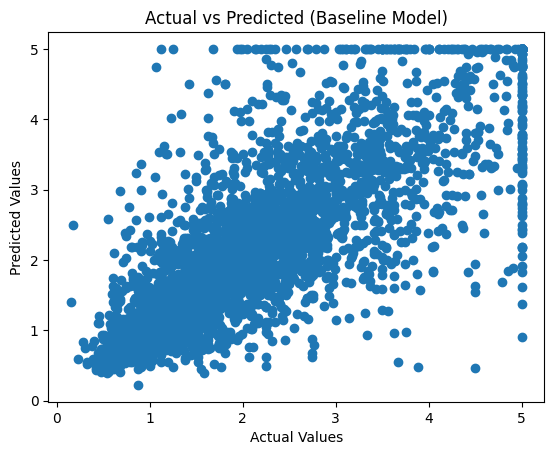

In [15]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Baseline Model)")
plt.show()

Cross-validation (detect overfitting)

In [17]:
cv_scores = cross_val_score(
    baseline_model,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=5
)
cv_rmse = -cv_scores
print("CV RMSE Scores:", cv_rmse)
print("Mean CV RMSE:", cv_rmse.mean())

CV RMSE Scores: [0.75341387 0.73444956 0.70174445 0.72871242 0.70172611]
Mean CV RMSE: 0.7240092833935426


Cross-Validation Score Plot

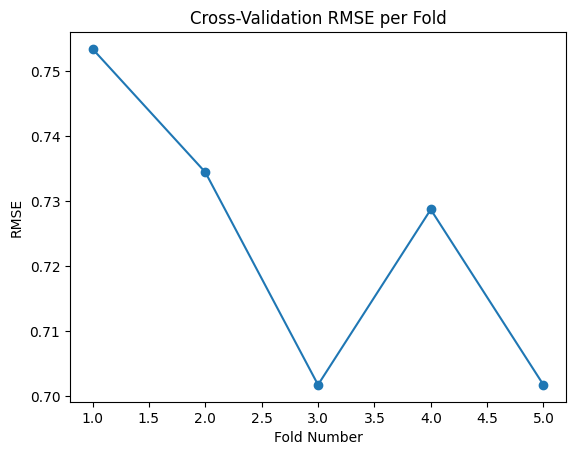

In [18]:
plt.figure()
plt.plot(range(1, 6), cv_rmse, marker='o')
plt.xlabel("Fold Number")
plt.ylabel("RMSE")
plt.title("Cross-Validation RMSE per Fold")
plt.show()

Hyperparameter tuning with GridSearchCV

In [8]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV RMSE: 0.6212924182133048


Evaluate tuned model

In [10]:
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned RMSE:", rmse_tuned)
print("Tuned R2 Score:", r2_tuned)

Tuned RMSE: 0.6384716878770479
Tuned R2 Score: 0.6889168931307286


Baseline vs Tuned Comparison Plot

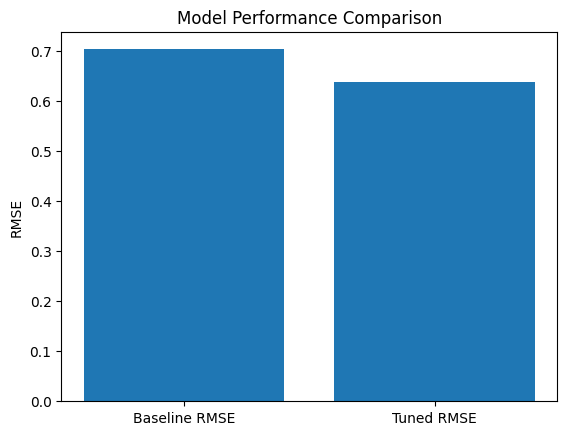

In [19]:
plt.figure()
plt.bar(["Baseline RMSE", "Tuned RMSE"], [rmse, rmse_tuned])
plt.title("Model Performance Comparison")
plt.ylabel("RMSE")
plt.show()